In [14]:

import warnings

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# AdaBoost

In [4]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

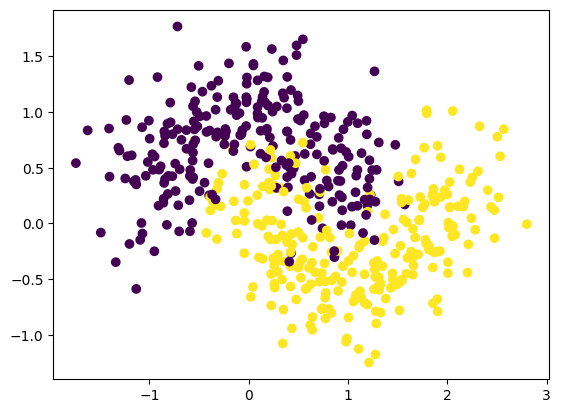

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [9]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=1, learning_rate=0.5,
    algorithm="SAMME.R", random_state=42)
ada_clf.fit(X_train, y_train)

/home/krystian/PycharmProjects/AI/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=1, random_state=42)

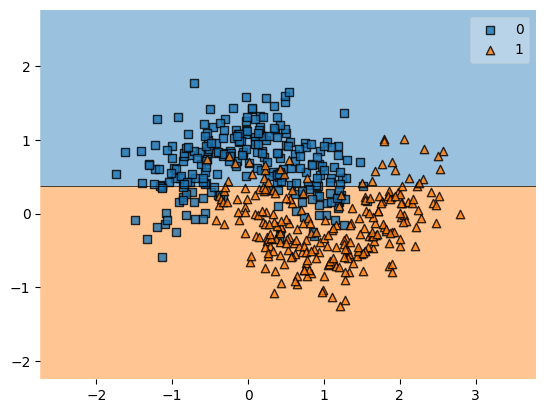

In [10]:
plot_decision_regions(X, y, ada_clf)
plt.show()

# Zad.

Sprawdż różne parametry dla AdaBoostClassifier

* n_estimators=2, learning_rate=0.5
* n_estimators=2, learning_rate=1
* n_estimators=10, learning_rate=0.5
* n_estimators=10, learning_rate=1

In [12]:
params = [
    (2, 0.5),
    (2, 1),
    (10, 0.5),
    (10, 1)
]

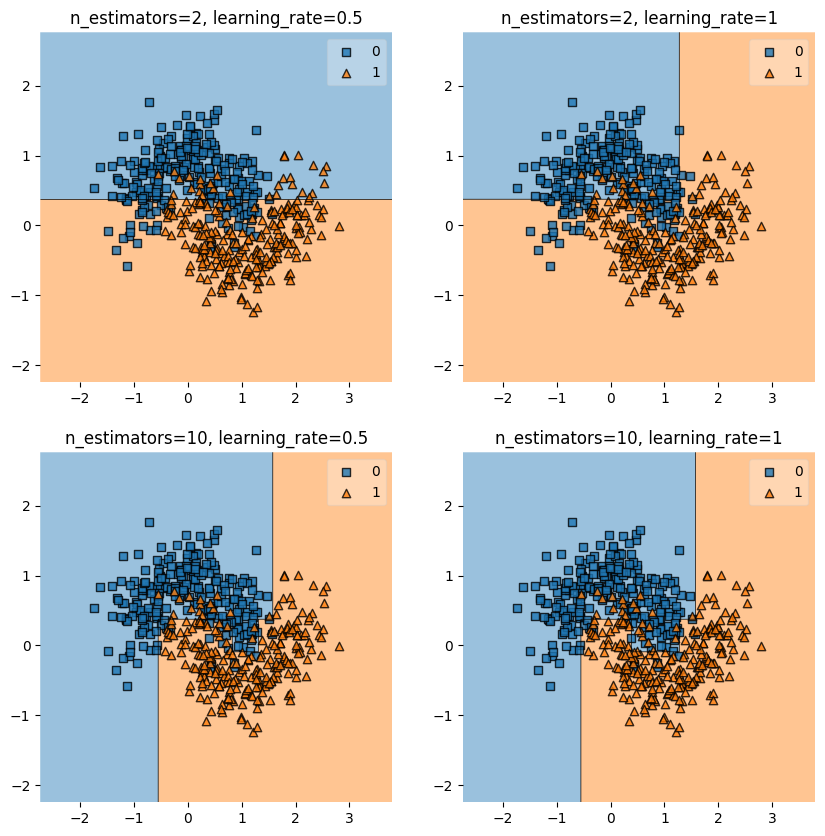

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for (n_estimators, learning_rate), ax in zip(params, axs.flatten()):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ada_clf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=1),
            n_estimators=n_estimators, learning_rate=learning_rate,
            algorithm="SAMME.R", random_state=42)
        ada_clf.fit(X_train, y_train)
    plot_decision_regions(X, y, ada_clf, ax=ax)
    ax.set_title(f"n_estimators={n_estimators}, learning_rate={learning_rate}")